In [5]:
#import libraries
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Load the data and split into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
#Get the image shape
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Take a look at the first image at traing dataset
x_train[0]

In [14]:
#print the image label
y_train[0]

5

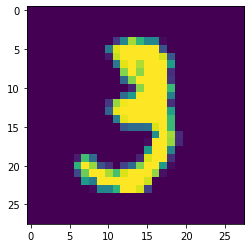

In [20]:
# show image as picutre
plt.imshow(x_train[10])

In [25]:
# Reshape data to fit the model
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [28]:
#One-Hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print the new label 
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
#Build the CNN model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu')) 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [32]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [33]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=3)


Epoch 1/3
1875/1875 [==============================] - 162s 79ms/step - loss: 0.9933 - accuracy: 0.9091 - val_loss: 0.0917 - val_accuracy: 0.9701
Epoch 2/3
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.0820 - val_accuracy: 0.9759
Epoch 3/3
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0849 - val_accuracy: 0.9764


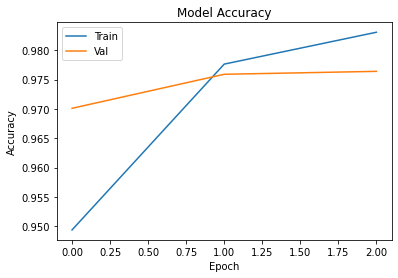

In [37]:
#Visulize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
#Show predictions as probabilities for the first images in the test
predictions = model.predict(x_test[:4])
predictions


array([[7.5357754e-13, 9.7333003e-14, 5.7690767e-07, 9.1542543e-06,
        1.8319923e-14, 1.0097723e-12, 3.6645840e-16, 9.9999022e-01,
        3.9068184e-09, 6.9499402e-09],
       [9.4600537e-08, 7.9030149e-05, 9.9617970e-01, 6.0134866e-08,
        2.9595403e-11, 9.9110954e-13, 3.7410895e-03, 1.2741868e-11,
        4.0934175e-08, 7.5856994e-11],
       [5.3936660e-06, 9.9987602e-01, 6.4848550e-06, 9.5195052e-09,
        6.6221444e-05, 2.3398547e-06, 8.5887552e-07, 9.9380815e-10,
        4.2594005e-05, 4.2162956e-08],
       [9.9999309e-01, 4.9028633e-12, 3.3499546e-08, 6.4478882e-12,
        4.1133780e-11, 1.7922318e-09, 1.4595986e-07, 4.6386298e-11,
        1.0710043e-07, 6.5497352e-06]], dtype=float32)

In [39]:
# Print out predictions as number labels for the first images
print(np.argmax(predictions, axis=1))

#Print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


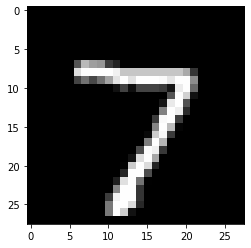

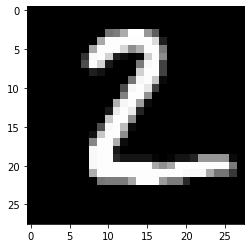

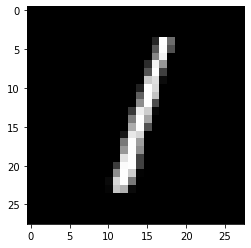

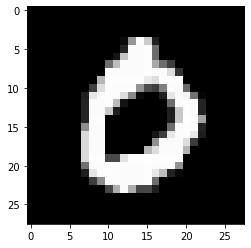

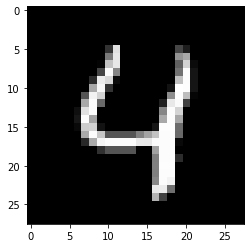

In [40]:
# Show first images as pictures

for i in range(0,5):
  image = x_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28, 28))

  plt.imshow(pixels, cmap='gray')
  plt.show()